In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import scipy
from utils import *

In [2]:
print("NumPy version:", np.__version__)
print("SciPy version:", scipy.__version__)

NumPy version: 1.26.3
SciPy version: 1.12.0


In [3]:
df = pd.read_csv("C:/Users/sriwa/Downloads/archive (5)/Housing.csv")

In [4]:
df.shape

(545, 13)

In [5]:
df.size

7085

In [6]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
df.isnull()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,False,False,False,False,False,False,False,False,False,False,False,False,False
541,False,False,False,False,False,False,False,False,False,False,False,False,False
542,False,False,False,False,False,False,False,False,False,False,False,False,False
543,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [9]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [10]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [11]:
zero_counts = (df == 0).sum()
zero_counts

# parking could be 0.

price                 0
area                  0
bedrooms              0
bathrooms             0
stories               0
mainroad              0
guestroom             0
basement              0
hotwaterheating       0
airconditioning       0
parking             299
prefarea              0
furnishingstatus      0
dtype: int64

In [12]:
df.sample(15)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
50,7420000,7440,3,2,4,yes,no,no,no,no,1,yes,unfurnished
312,4098500,3600,3,1,1,yes,no,yes,no,yes,0,yes,furnished
468,3010000,2835,2,1,1,yes,no,no,no,no,0,no,semi-furnished
435,3290000,4040,2,1,1,yes,no,no,no,no,0,no,unfurnished
18,8890000,4600,3,2,2,yes,yes,no,no,yes,2,no,furnished
413,3430000,1950,3,2,2,yes,no,yes,no,no,0,yes,unfurnished
278,4277000,3400,3,1,2,yes,no,yes,no,no,2,yes,semi-furnished
251,4515000,3450,3,1,2,yes,no,yes,no,no,1,no,semi-furnished
534,2100000,3000,4,1,2,yes,no,no,no,no,0,no,unfurnished
372,3640000,3180,3,1,2,no,no,yes,no,no,0,no,semi-furnished


In [13]:
any_missing = (df == '?').sum()
any_missing

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [14]:
has_negative_values = any(isinstance(x, (int, float)) and x < 0 for x in df)
has_negative_values

False

In [15]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


<function matplotlib.pyplot.show(close=None, block=None)>

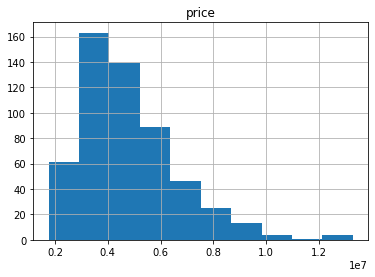

In [16]:
df.hist("price")
plt.show

In [17]:
df.shape

(545, 13)

In [18]:
duplicate = df.duplicated()
print(duplicate.sum())
df[duplicate] # see no of duplicates are present

0


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


In [19]:
df=df.drop_duplicates()

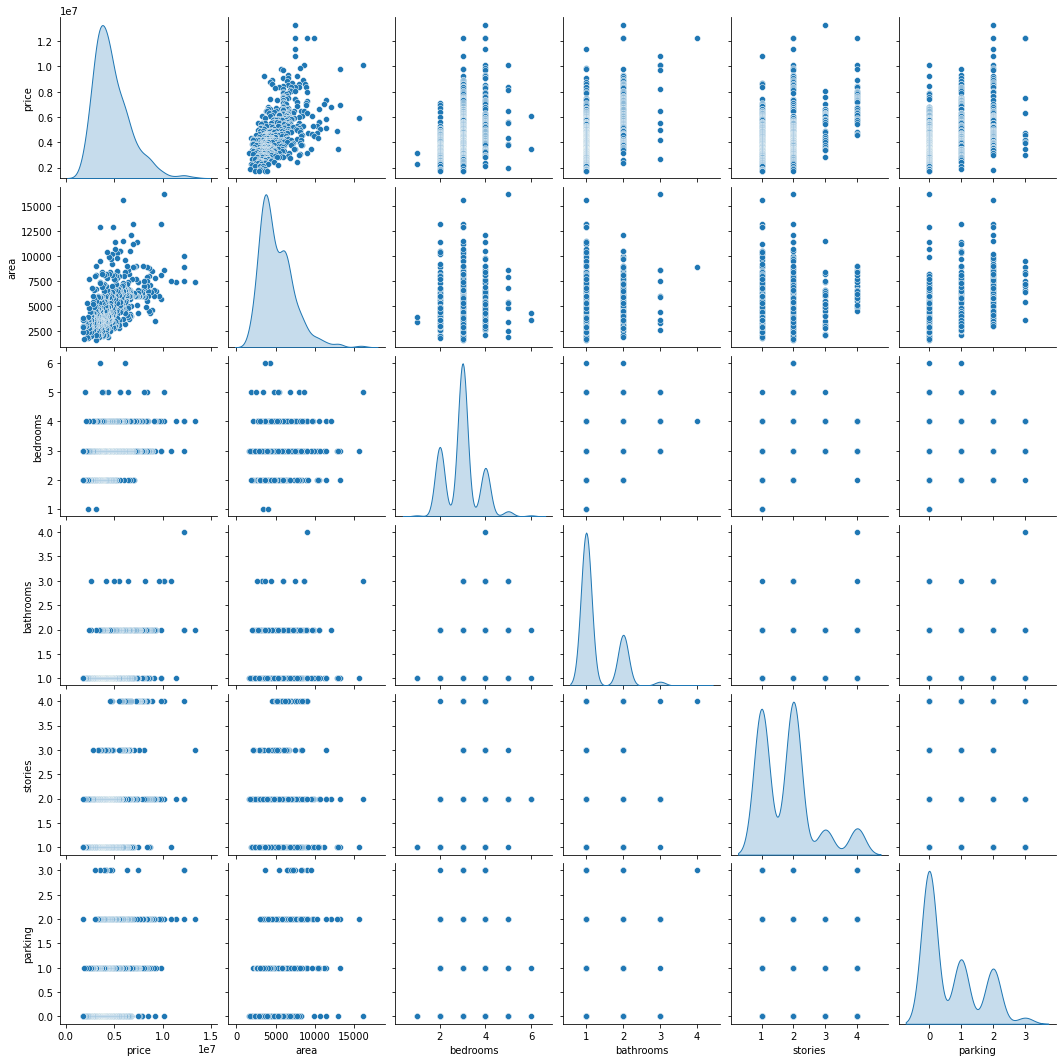

In [20]:
sns.pairplot(df,diag_kind = 'kde')

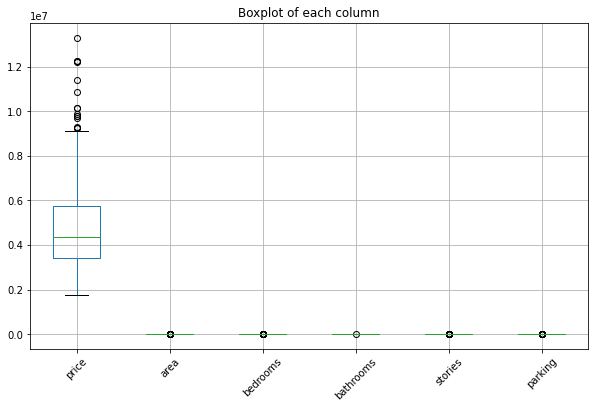

In [44]:
plt.figure(figsize=(10, 6))
df.boxplot()
plt.title('Boxplot of each column')
plt.xticks(rotation=45)
plt.show()

In [51]:
# Assuming df is your DataFrame and 'column_name' is the column you want to remove outliers from

# Calculate the first and third quartiles (Q1 and Q3)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to exclude outliers
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]



In [52]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished
16,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished
17,8960000,8500,3,2,4,yes,no,no,no,yes,2,no,furnished
18,8890000,4600,3,2,2,yes,yes,no,no,yes,2,no,furnished
19,8855000,6420,3,2,2,yes,no,no,no,yes,1,yes,semi-furnished


In [53]:
corr = df.corr()
corr

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.509856,0.332293,0.457962,0.432528,0.328308
area,0.509856,1.000000,0.112056,0.133472,0.063939,0.344797
bedrooms,0.332293,0.112056,1.000000,0.350025,0.404628,0.110234
bathrooms,0.457962,0.133472,0.350025,1.000000,0.308026,0.127184
stories,0.432528,0.063939,0.404628,0.308026,1.000000,0.019222
parking,0.328308,0.344797,0.110234,0.127184,0.019222,1.000000


<AxesSubplot:>

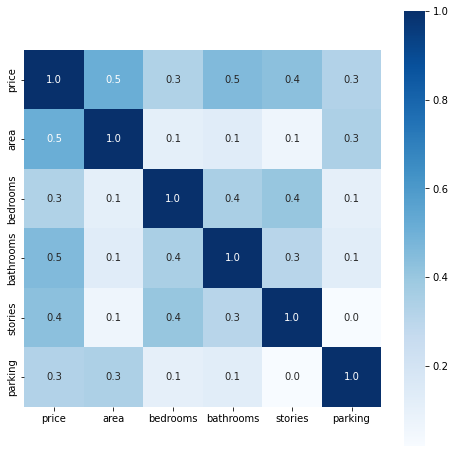

In [54]:
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True, square = True, fmt = '.1f', annot = True, cmap = 'Blues')
#annot_kws ={'size' : 8}

In [55]:
duplicate = df.duplicated()
print(duplicate.sum())
df[duplicate]

0


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


In [56]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished
16,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished
17,8960000,8500,3,2,4,yes,no,no,no,yes,2,no,furnished
18,8890000,4600,3,2,2,yes,yes,no,no,yes,2,no,furnished
19,8855000,6420,3,2,2,yes,no,no,no,yes,1,yes,semi-furnished


In [57]:
for column in df.select_dtypes(include='object').columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in mainroad: ['yes' 'no']
Unique values in guestroom: ['no' 'yes']
Unique values in basement: ['yes' 'no']
Unique values in hotwaterheating: ['no' 'yes']
Unique values in airconditioning: ['no' 'yes']
Unique values in prefarea: ['no' 'yes']
Unique values in furnishingstatus: ['semi-furnished' 'unfurnished' 'furnished']


In [58]:
df_encoded = pd.get_dummies(df, columns=['mainroad', 'guestroom', 'basement','hotwaterheating','airconditioning','prefarea','furnishingstatus'])

In [59]:
df_encoded

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
15,9100000,6000,4,1,2,2,0,1,1,0,...,1,1,0,1,0,1,0,0,1,0
16,9100000,6600,4,2,2,1,0,1,0,1,...,1,1,0,0,1,0,1,0,0,1
17,8960000,8500,3,2,4,2,0,1,1,0,...,0,1,0,0,1,1,0,1,0,0
18,8890000,4600,3,2,2,2,0,1,0,1,...,0,1,0,0,1,1,0,1,0,0
19,8855000,6420,3,2,2,1,0,1,1,0,...,0,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,0,1,1,0,...,1,1,0,1,0,1,0,0,0,1
541,1767150,2400,3,1,1,0,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
542,1750000,3620,2,1,1,0,0,1,1,0,...,0,1,0,1,0,1,0,0,0,1
543,1750000,2910,3,1,1,0,1,0,1,0,...,0,1,0,1,0,1,0,1,0,0


In [60]:
df_encoded.dtypes

price                              int64
area                               int64
bedrooms                           int64
bathrooms                          int64
stories                            int64
parking                            int64
mainroad_no                        uint8
mainroad_yes                       uint8
guestroom_no                       uint8
guestroom_yes                      uint8
basement_no                        uint8
basement_yes                       uint8
hotwaterheating_no                 uint8
hotwaterheating_yes                uint8
airconditioning_no                 uint8
airconditioning_yes                uint8
prefarea_no                        uint8
prefarea_yes                       uint8
furnishingstatus_furnished         uint8
furnishingstatus_semi-furnished    uint8
furnishingstatus_unfurnished       uint8
dtype: object

In [61]:
scaler = StandardScaler()

In [62]:
df_encoded[['price','area','bedrooms','bathrooms','stories','parking']]=StandardScaler().fit_transform(df_encoded[['price','area','bedrooms','bathrooms','stories','parking']])

In [63]:
df_encoded

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
15,2.821586,0.452609,1.447749,-0.561254,0.245614,1.585532,0,1,1,0,...,1,1,0,1,0,1,0,0,1,0
16,2.821586,0.741976,1.447749,1.594286,0.245614,0.398622,0,1,0,1,...,1,1,0,0,1,0,1,0,0,1
17,2.733790,1.658306,0.077558,1.594286,2.570175,1.585532,0,1,1,0,...,0,1,0,0,1,1,0,1,0,0
18,2.689893,-0.222581,0.077558,1.594286,0.245614,1.585532,0,1,0,1,...,0,1,0,0,1,1,0,1,0,0
19,2.667944,0.655166,0.077558,1.594286,0.245614,0.398622,0,1,1,0,...,0,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,-1.743786,-0.994226,-1.292633,-0.561254,-0.916667,1.585532,0,1,1,0,...,1,1,0,1,0,1,0,0,0,1
541,-1.776929,-1.283593,0.077558,-0.561254,-0.916667,-0.788287,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
542,-1.787684,-0.695214,-1.292633,-0.561254,-0.916667,-0.788287,0,1,1,0,...,0,1,0,1,0,1,0,0,0,1
543,-1.787684,-1.037631,0.077558,-0.561254,-0.916667,-0.788287,1,0,1,0,...,0,1,0,1,0,1,0,1,0,0


In [64]:
X = df_encoded.drop(['price'],axis=1)

In [65]:
y = df_encoded[['price']]

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2, random_state=43)

In [92]:
df_encoded.shape

(530, 21)

In [93]:
reg_model = LinearRegression()



In [94]:
reg_model.fit(X_train,y_train)



LinearRegression()

In [95]:
reg_model.score(X_train,y_train)



0.6588977265733642

In [96]:
reg_model.score(X_test,y_test)

0.6841882052361118

In [109]:
def get_model():
    
    model = Sequential([
        Dense(30, input_shape = (20,), activation = 'relu'),
        Dense(60, activation = 'relu'),
        Dense(12, activation = 'relu'),
        Dense(1)
    ])

    model.compile(
        loss='mse',
        optimizer='adadelta'
    )
    
    return model

In [110]:
model = get_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 30)                630       
                                                                 
 dense_12 (Dense)            (None, 60)                1860      
                                                                 
 dense_13 (Dense)            (None, 12)                732       
                                                                 
 dense_14 (Dense)            (None, 1)                 13        
                                                                 
Total params: 3235 (12.64 KB)
Trainable params: 3235 (12.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [111]:
model = get_model()

# this prediction is before training the model
preds_on_untrained = model.predict(X_test)

4/4 [==============================] - 0s 4ms/step


In [116]:
# Train model and store in the object history
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=2000
)


Epoch 1/2000
14/14 [==============================] - 0s 16ms/step - loss: 0.7515 - val_loss: 0.7175
Epoch 2/2000
14/14 [==============================] - 0s 8ms/step - loss: 0.7513 - val_loss: 0.7172
Epoch 3/2000
14/14 [==============================] - 0s 8ms/step - loss: 0.7511 - val_loss: 0.7169
Epoch 4/2000
14/14 [==============================] - 0s 9ms/step - loss: 0.7508 - val_loss: 0.7167
Epoch 5/2000
14/14 [==============================] - 0s 8ms/step - loss: 0.7506 - val_loss: 0.7164
Epoch 6/2000
14/14 [==============================] - 0s 8ms/step - loss: 0.7504 - val_loss: 0.7161
Epoch 7/2000
14/14 [==============================] - 0s 8ms/step - loss: 0.7502 - val_loss: 0.7158
Epoch 8/2000
14/14 [==============================] - 0s 7ms/step - loss: 0.7500 - val_loss: 0.7156
Epoch 9/2000
14/14 [==============================] - 0s 10ms/step - loss: 0.7497 - val_loss: 0.7153
Epoch 10/2000
14/14 [==============================] - 0s 8ms/step - loss: 0.7495 - val_loss: 0.71

In [117]:
def plot_loss(history):
    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

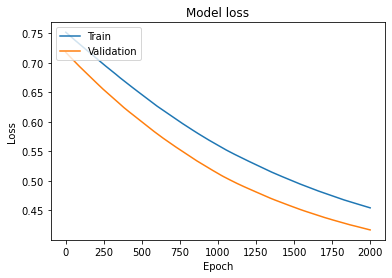

In [118]:
plot_loss(history)

In [119]:
preds_on_trained=model.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [120]:
def compare_predictions(preds_on_untrained, preds_on_trained, y_test):
    plt.scatter(y_test, preds_on_untrained, label='Untrained Model', alpha=0.5)
    plt.scatter(y_test, preds_on_trained, label='Trained Model', alpha=0.5)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.legend()
    plt.show()

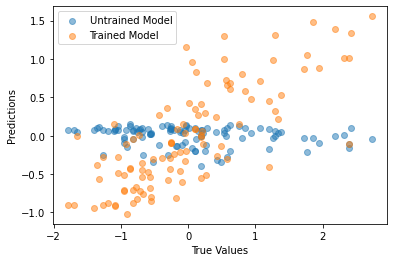

In [121]:
compare_predictions(preds_on_untrained,preds_on_trained,y_test)